Webside users segmentation

I decided to segment website users separately for those who made a purchase (ordered=1) and those who did not make a purchase (ordered=0). This will help to understand the differences in behaviors of both groups (different behavior patterns on the website). For example, people who made a purchase may be more engaged in certain activities on the website (e.g., viewing delivery details, saw checkout, etc.).

Segmenting these groups separately allows for the creation of dedicated marketing strategies:

- For buyers: maintaining loyalty, cross-selling (how to make them buy more, more often, and for a longer period of time)
- For non-buyers: optimizing conversion by better understanding their purchase barriers.

In [49]:
# Import libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import prince
from IPython.display import display

In [50]:
# General settings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [52]:
# Getting data
df_train = pd.read_csv('Data/training_sample.csv')

In [53]:
# First look at the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [54]:
# Spliting data into two categories
buyers = df_train[df_train['ordered'] == 1].drop(columns=['ordered', 'UserID'])
non_buyers = df_train[df_train['ordered'] == 0].drop(columns=['ordered', 'UserID'])

Due to the binary nature of the variables in the dataset and their large number, I decided to use Multiple Correspondence Analysis (MCA), followed by segmentation of customers and non-customers in the MCA space using the k-means method. MCA is the equivalent of PCA for categorical/binary variables. It reduces the dimensions of the data, making segmentation easier. It also allows for the analysis and visualization of data in a 2D space. After several experiments with the number of MCA components, I chose 8 components because MCA with 8 dimensions explain more then 50 % of variance in the dataset (yet it is not a great result).

**1. Buyers segmentation**

In [27]:
# Creating MCA model
mca = prince.MCA(
    n_components=8,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Model fitting and data transformation
mca_results_buyers = mca.fit_transform(buyers)

# Adding MCA results to original dataset
buyers_with_mca = buyers.copy()

for i in range(mca.n_components):
    buyers_with_mca[f'MCA{i}'] = mca_results_buyers.iloc[:, i- 1]

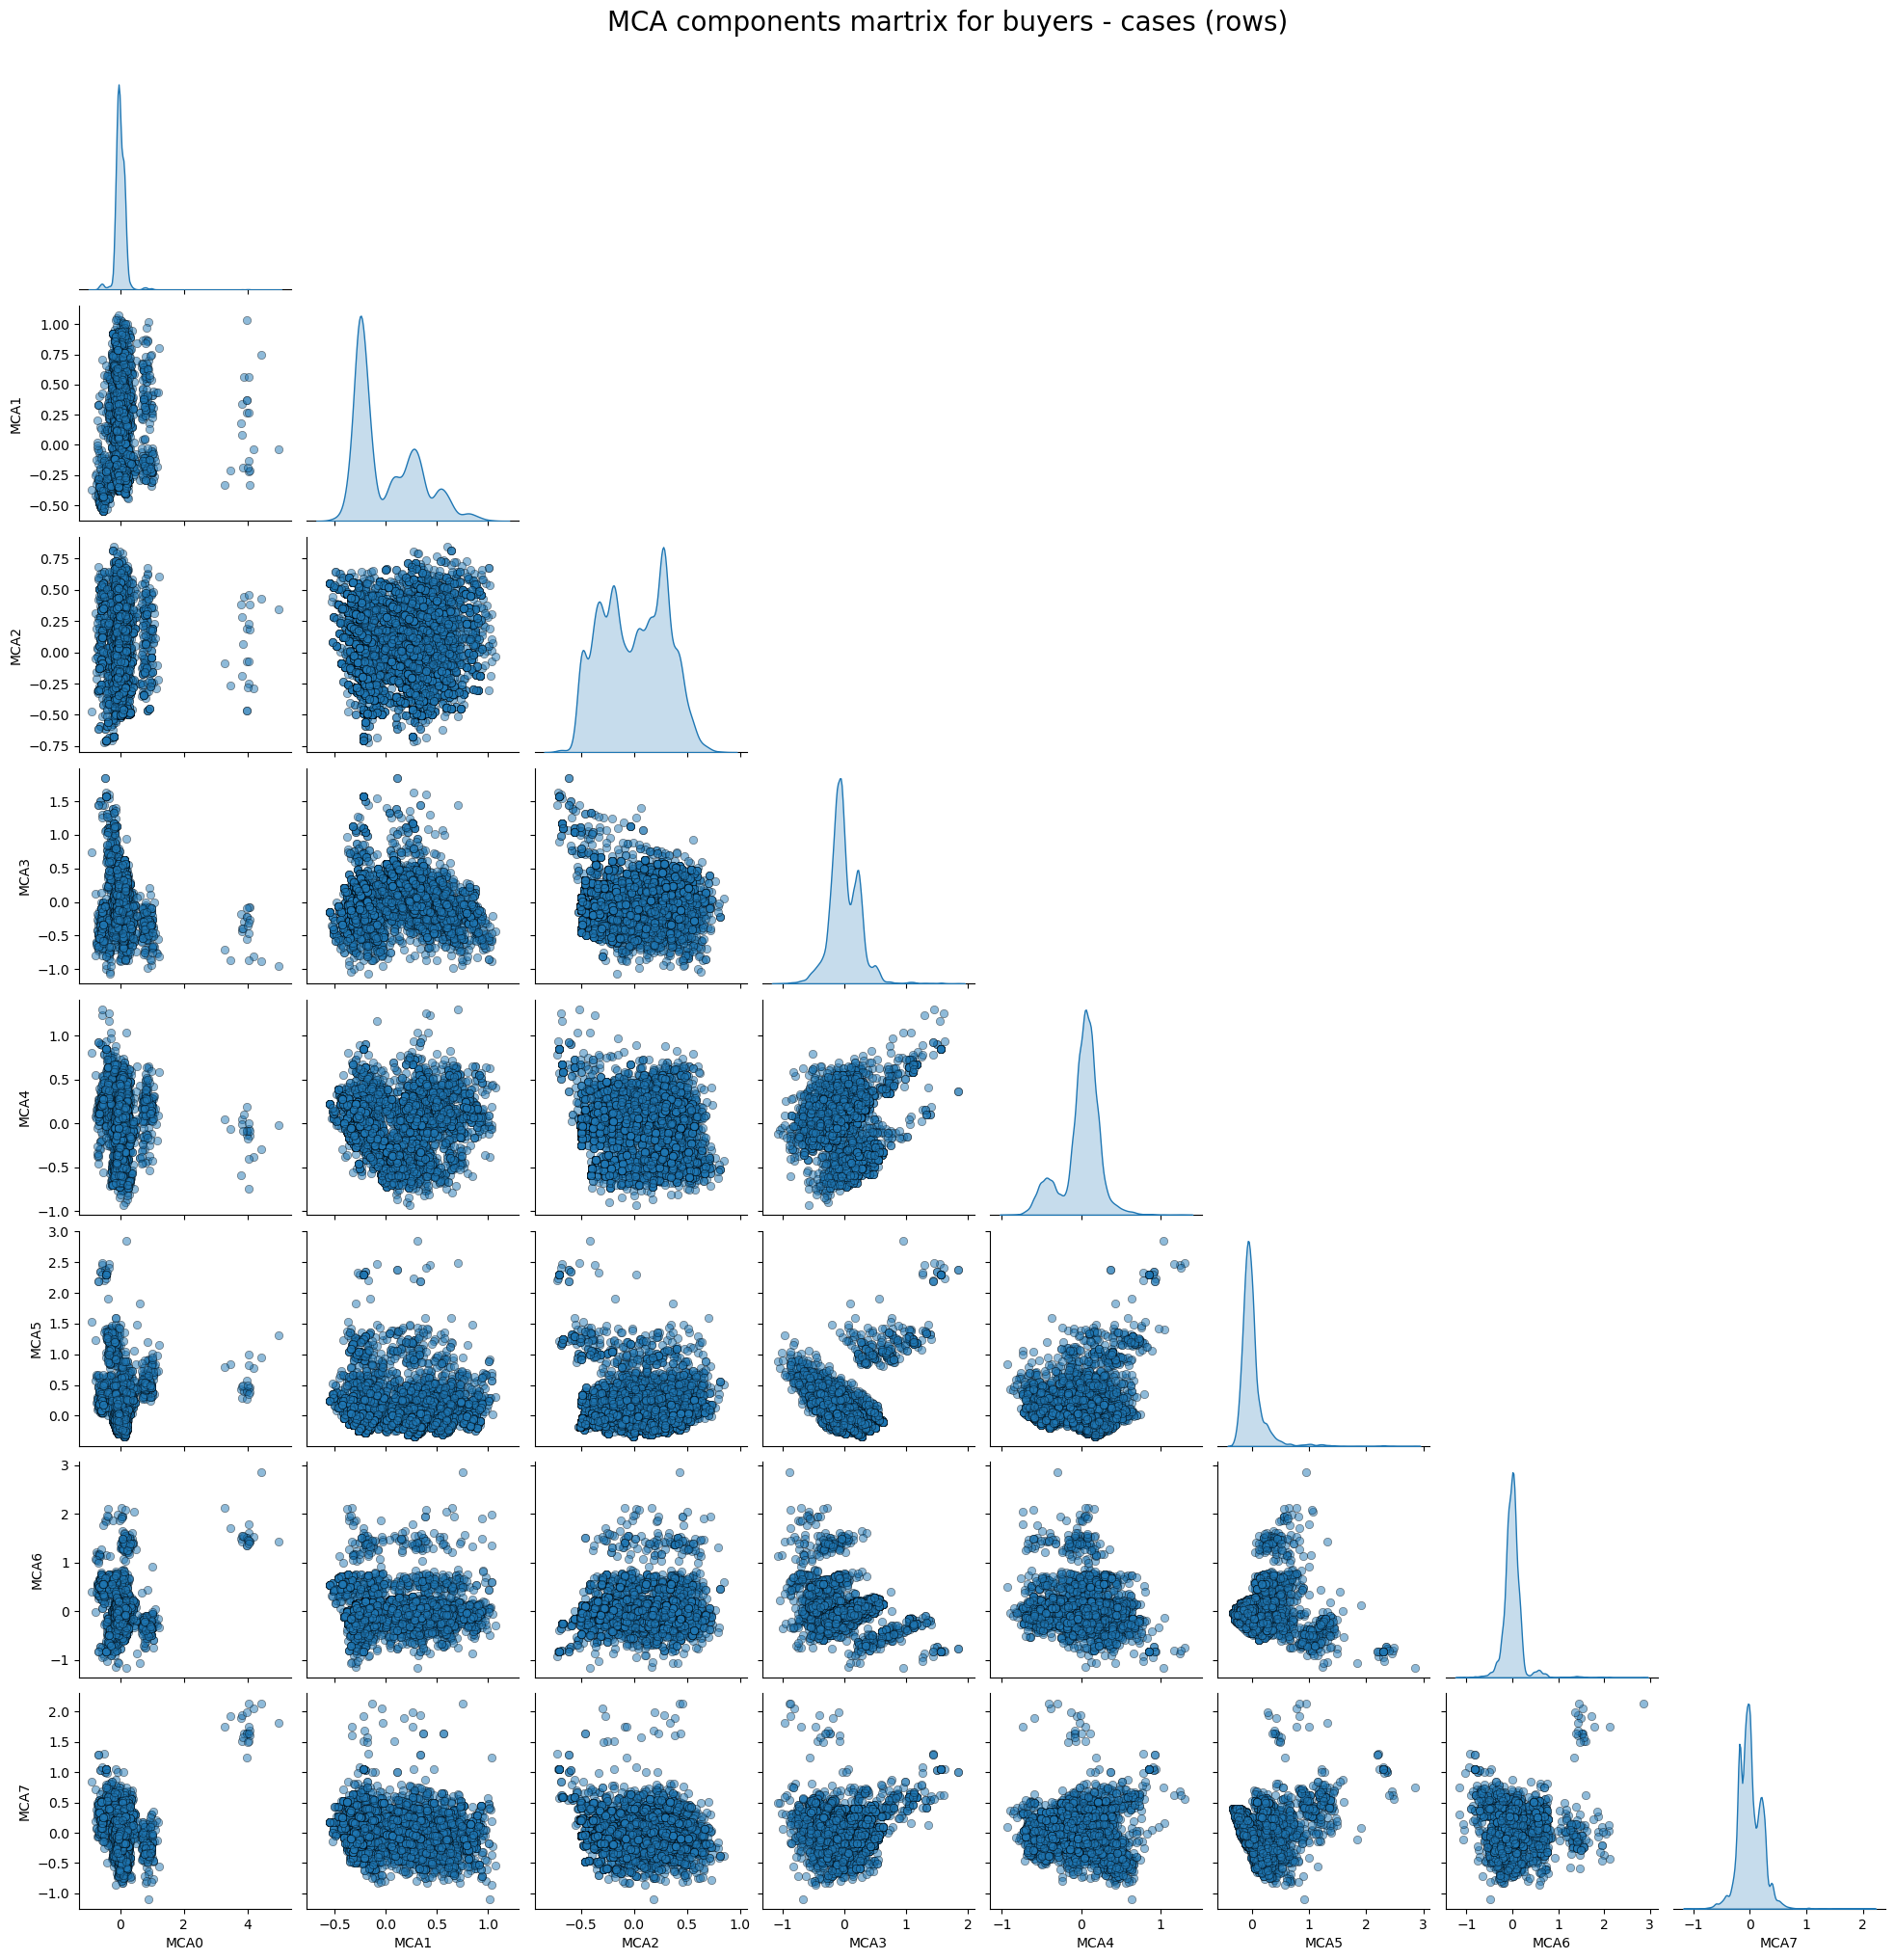

In [28]:
# Choosing all MCA components
buyers_mca_only = buyers_with_mca[['MCA0', 'MCA1', 'MCA2', 'MCA3', 'MCA4', 'MCA5', 'MCA6', 'MCA7']]

# Creating pairplot matrix 
pairplot = sns.pairplot(
    buyers_mca_only,
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 'edgecolor': 'k'},
    corner=True
)
pairplot.fig.suptitle('MCA components martrix for buyers - cases (rows)', fontsize=20, y=1.02)
plt.show()

In [29]:
# Checking eigenvalues and % of variance explained by each component
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.099        10.31%                     10.31%
1              0.090         9.43%                     19.73%
2              0.058         6.09%                     25.83%
3              0.054         5.66%                     31.49%
4              0.050         5.20%                     36.68%
5              0.047         4.88%                     41.57%
6              0.045         4.71%                     46.28%
7              0.044         4.60%                     50.88%

In [30]:
# Checking row (cases - buyers) coordinates for each MCA component
mca.row_coordinates(buyers).head()

0         1         2         3         4         5         6  \
4   0.414229  0.357280  0.408941 -0.300678 -0.123697  0.142242  0.298421   
47  0.541981  0.400095 -0.132301  0.169098 -0.194959 -0.100425  0.203913   
56  0.117936  0.120673  0.052515 -0.507634 -0.010816 -0.015903  0.104279   
62  0.190745  0.297507  0.286415  0.305401 -0.171291  0.129342  0.006734   
66 -0.139051 -0.499225 -0.125859 -0.109327 -0.125289 -0.121110  0.206433   

           7  
4  -0.111232  
47 -0.086510  
56 -0.149576  
62  0.035546  
66  0.003597

In [31]:
# Checking column (features) coordinates for each MCA component
mca.column_coordinates(buyers).head(50)

0             1             2  \
basket_icon_click__0        3.493167e-01 -8.580768e-01  2.221850e-01   
basket_icon_click__1       -1.419188e-01  3.486154e-01 -9.026827e-02   
basket_add_list__0          1.698615e-02 -7.003482e-01 -1.464727e-01   
basket_add_list__1         -2.200358e-02  9.072196e-01  1.897384e-01   
basket_add_detail__0       -1.906001e-01  1.628424e-01  1.092087e+00   
basket_add_detail__1        6.700078e-02 -5.724323e-02 -3.838965e-01   
sort_by__0                 -1.673892e-01 -8.717269e-02  1.253126e-02   
sort_by__1                  1.777810e+00  9.258451e-01 -1.330922e-01   
image_picker__0            -1.700410e-01 -2.949004e-02  4.355623e-02   
image_picker__1             1.907114e+00  3.307489e-01 -4.885098e-01   
account_page_click__0       2.388798e-02 -1.097240e-02  3.258166e-02   
account_page_click__1      -1.176357e+00  5.403331e-01 -1.604475e+00   
promo_banner_click__0      -7.821454e-03 -4.332517e-02  4.531712e-02   
promo_banner_click__1       1.475740e-01  8.174527e-01 -8.550364e-01   
detail_wishlist_add__0     -4.212849e-03 -2.620797e-03  1.671314e-02   
detail_wishlist_add__1      4.104053e-01  2.553116e-01 -1.628153e+00   
list_size_dropdown__0       8.885642e-02 -8.795655e-01 -5.726210e-02   
list_size_dropdown__1      -7.506007e-02  7.429992e-01  4.837126e-02   
closed_minibasket_click__0  6.497709e-02 -1.210303e-01  4.585354e-02   
closed_minibasket_click__1 -5.568814e-01  1.037282e+00 -3.929844e-01   
checked_delivery_detail__0  3.107617e-02 -2.486091e-01  2.550170e+00   
checked_delivery_detail__1 -3.239842e-04  2.591871e-03 -2.658676e-02   
checked_returns_detail__0  -2.646496e-02 -1.046987e-03  6.702708e-02   
checked_returns_detail__1   7.026771e-01  2.779879e-02 -1.779651e+00   
sign_in__0                 -2.019161e-02 -1.480667e+00  4.624853e+00   
sign_in__1                  1.244951e-04  9.129322e-03 -2.851538e-02   
saw_checkout__1             1.820375e-16  1.674957e-16 -1.793270e-16   
saw_sizecharts__0          -5.458317e-04 -2.158716e-04  1.773871e-03   
saw_sizecharts__1           4.957192e-01  1.960526e-01 -1.611013e+00   
saw_delivery__0            -1.175522e-02 -9.423491e-03  2.395441e-02   
saw_delivery__1             6.918262e-01  5.545976e-01 -1.409781e+00   
saw_account_upgrade__0     -2.195963e-03 -3.991638e-03  5.689114e-03   
saw_account_upgrade__1      4.213143e-01  7.658300e-01 -1.091505e+00   
saw_homepage__0            -9.799234e-02 -5.015400e-01  2.257575e-01   
saw_homepage__1             5.699173e-02  2.916925e-01 -1.312991e-01   
device_mobile__0            1.028367e+00  6.380384e-02  2.832178e-01   
device_mobile__1           -7.292740e-01 -4.524698e-02 -2.008461e-01   
device_computer__0         -5.041072e-01  4.066163e-02  4.209844e-02   
device_computer__1          1.250664e+00 -1.008794e-01 -1.044440e-01   
device_tablet__0           -9.303695e-02 -8.540274e-02 -1.663652e-01   
device_tablet__1            5.054653e-01  4.639889e-01  9.038538e-01   
returning_user__0           2.265751e-01 -5.732910e-02 -4.772955e-01   
returning_user__1          -1.072726e-01  2.714261e-02  2.259769e-01   
loc_uk__0                   8.967671e-01  1.982439e-01 -1.131497e-01   
loc_uk__1                  -2.679805e-02 -5.924111e-03  3.381246e-03   

                                       3             4             5  \
basket_icon_click__0        1.735343e-03 -1.057090e-01  1.383499e-01   
basket_icon_click__1       -7.050271e-04  4.294698e-02 -5.620816e-02   
basket_add_list__0         -1.373264e-01  1.443927e-01  3.659982e-02   
basket_add_list__1          1.778903e-01 -1.870439e-01 -4.741080e-02   
basket_add_detail__0        4.115289e-01 -1.556209e-01  4.912493e-01   
basket_add_detail__1       -1.446629e-01  5.470472e-02 -1.726866e-01   
sort_by__0                 -2.012351e-02 -9.600281e-03 -9.950218e-04   
sort_by__1                  2.137281e-01  1.019628e-01  1.056794e-02   
image_picker__0             2.592211e-03 -1.373667e-02  1.764213e-02   
image_

We can also calculate the weights (i.e., the contributions of individual variables to each MCA component) based on the column coordinates obtained through mca.column_coordinates(). For each component, the three features with the highest weights (i.e., those having the greatest impact on each MCA dimension) will be shown.

In [32]:
# Features coordinetes
column_coords = mca.column_coordinates(buyers)

# Weight calculations for each dimension (absolute values)
absolute_weights = column_coords.abs()

# 3 features with highest weights for each dimension
top_variables_per_dimension = {}
for dimension in absolute_weights.columns:
    top_variables = absolute_weights[dimension].nlargest(3)
    top_variables_per_dimension[dimension] = top_variables

for dimension, top_variables in top_variables_per_dimension.items():
    print(f"Top 3 variables for dimension {dimension}:")
    display(top_variables)


Top 3 variables for dimension 0:


image_picker__1       1.907114
sort_by__1            1.777810
device_computer__1    1.250664
Name: 0, dtype: float64

Top 3 variables for dimension 1:


sign_in__0                    1.480667
closed_minibasket_click__1    1.037282
sort_by__1                    0.925845
Name: 1, dtype: float64

Top 3 variables for dimension 2:


sign_in__0                    4.624853
checked_delivery_detail__0    2.550170
checked_returns_detail__1     1.779651
Name: 2, dtype: float64

Top 3 variables for dimension 3:


sign_in__0          2.737472
device_tablet__1    1.835285
loc_uk__0           1.616991
Name: 3, dtype: float64

Top 3 variables for dimension 4:


sign_in__0                    6.726637
checked_delivery_detail__0    5.342644
saw_sizecharts__1             2.577130
Name: 4, dtype: float64

Top 3 variables for dimension 5:


saw_sizecharts__1         7.605362
saw_account_upgrade__1    6.817448
saw_delivery__1           2.831871
Name: 5, dtype: float64

Top 3 variables for dimension 6:


saw_sizecharts__1             8.218541
sign_in__0                    3.056763
checked_delivery_detail__0    2.197087
Name: 6, dtype: float64

Top 3 variables for dimension 7:


saw_sizecharts__1         18.802752
detail_wishlist_add__1     4.024371
account_page_click__1      2.487625
Name: 7, dtype: float64

MCA also allows us to visualize individual features (variables) in the two-dimensional space of the respective MCA dimensions. Points represent variables (columns) from the input data. Each point is placed in the MCA space based on their coordinates in the new dimensions (MCA components). The closer the variables are to each other, the more related they are (co-occur) in the data. Variables that are far apart have a weaker relationship or are contradictory to each other. If a variable is far from the point (0,0 - the origin of the coordinate system) in the direction of a given axis, it has a greater influence on the given MCA component.

To increase the clarity of the chart, long variable labels have been replaced with their short counterparts. The name map is located below the chart matrix.

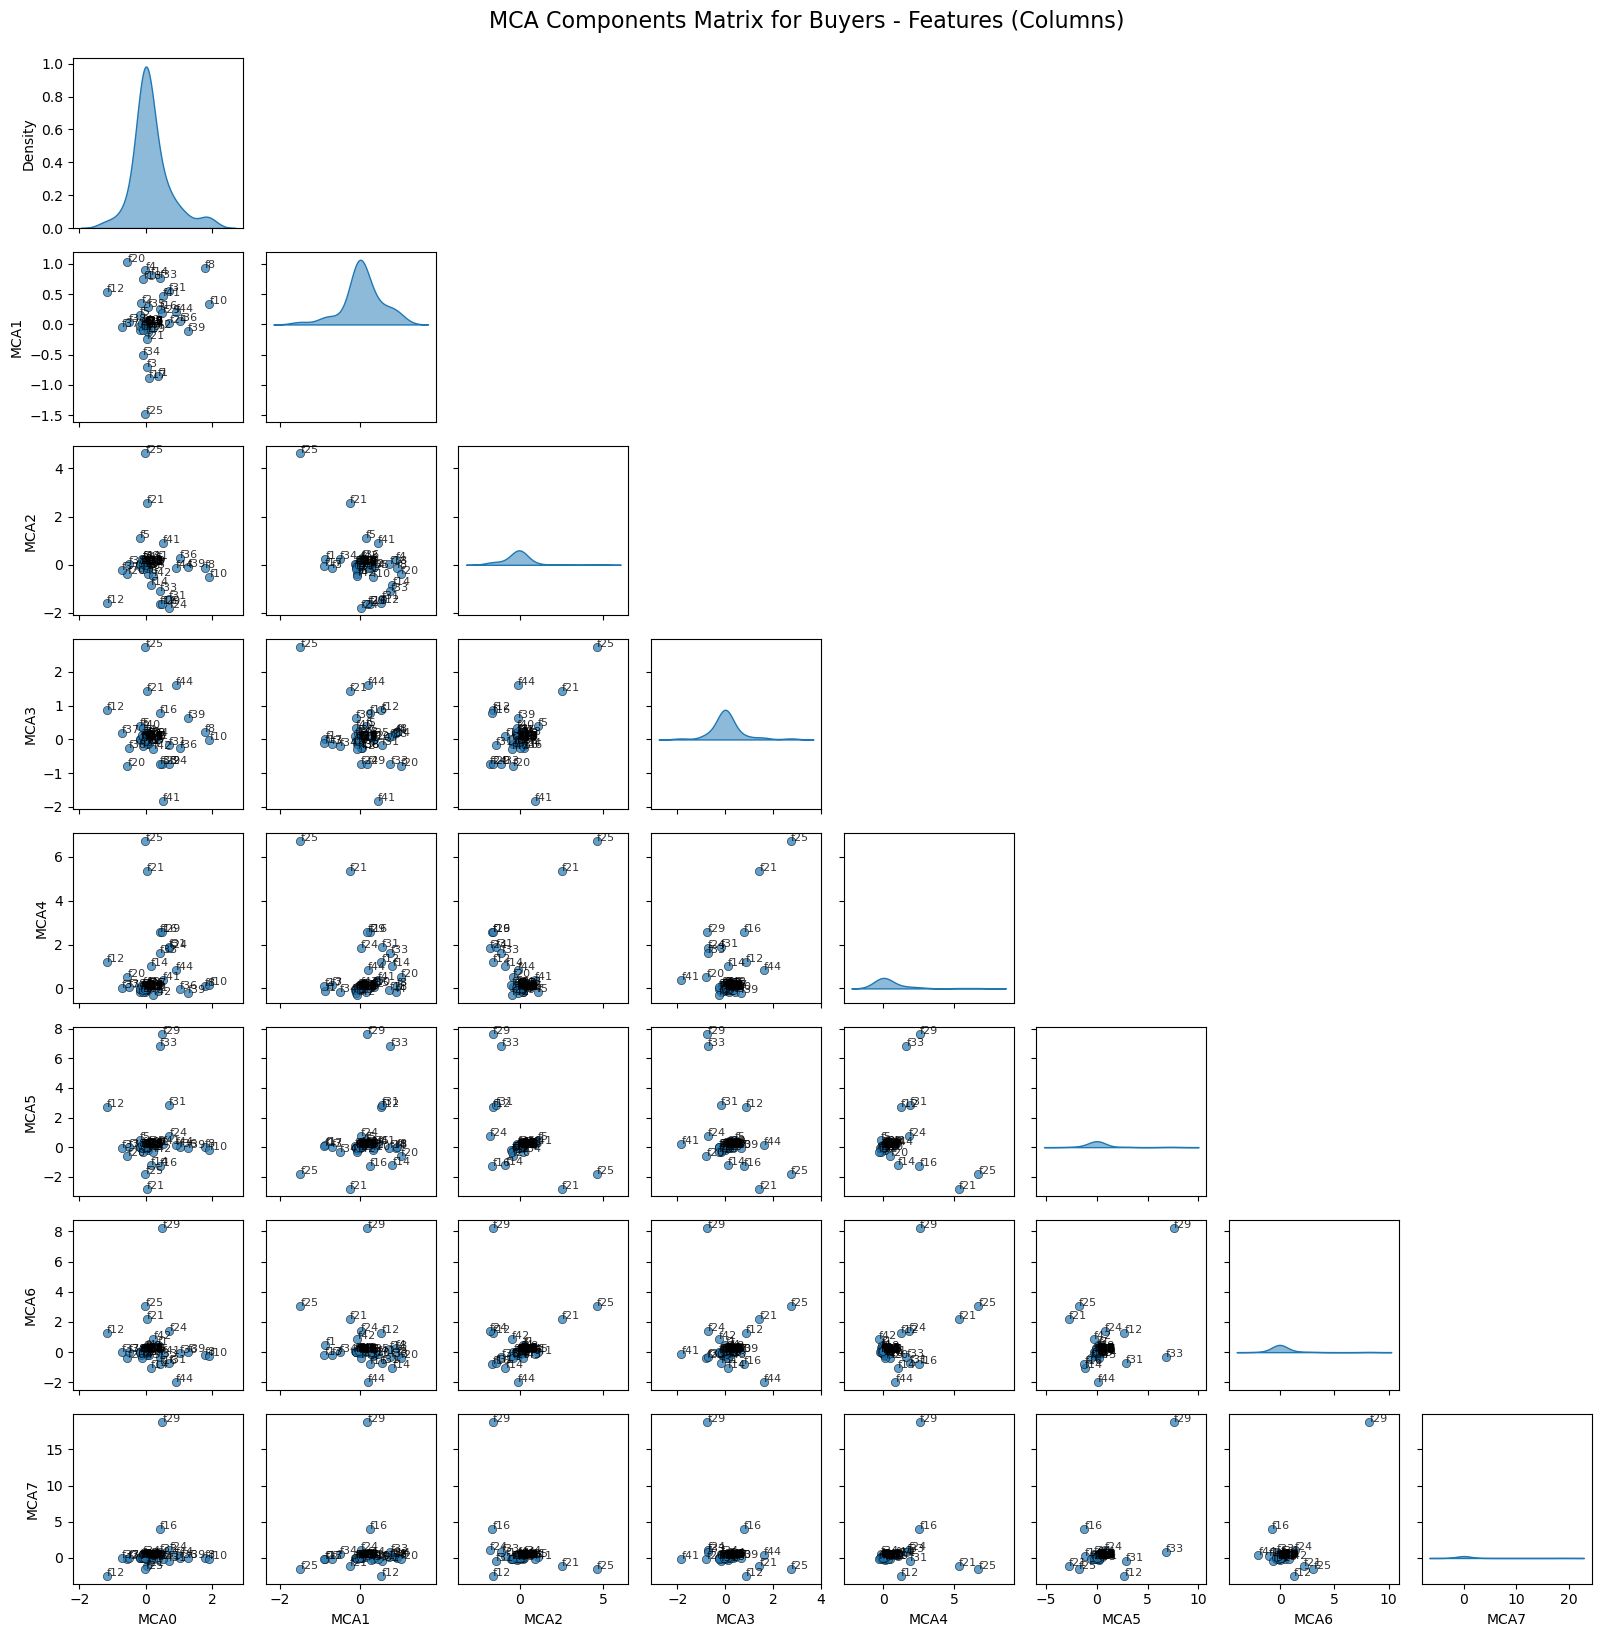

Feature Short Names Mapping:
f1: basket_icon_click__0
f2: basket_icon_click__1
f3: basket_add_list__0
f4: basket_add_list__1
f5: basket_add_detail__0
f6: basket_add_detail__1
f7: sort_by__0
f8: sort_by__1
f9: image_picker__0
f10: image_picker__1
f11: account_page_click__0
f12: account_page_click__1
f13: promo_banner_click__0
f14: promo_banner_click__1
f15: detail_wishlist_add__0
f16: detail_wishlist_add__1
f17: list_size_dropdown__0
f18: list_size_dropdown__1
f19: closed_minibasket_click__0
f20: closed_minibasket_click__1
f21: checked_delivery_detail__0
f22: checked_delivery_detail__1
f23: checked_returns_detail__0
f24: checked_returns_detail__1
f25: sign_in__0
f26: sign_in__1
f27: saw_checkout__1
f28: saw_sizecharts__0
f29: saw_sizecharts__1
f30: saw_delivery__0
f31: saw_delivery__1
f32: saw_account_upgrade__0
f33: saw_account_upgrade__1
f34: saw_homepage__0
f35: saw_homepage__1
f36: device_mobile__0
f37: device_mobile__1
f38: device_computer__0
f39: device_computer__1
f40: device_tab

In [ ]:
# Short features name map
short_labels = {feature: f"f{i+1}" for i, feature in enumerate(column_coords.index)}
column_coords_df['Short Feature'] = column_coords_df['Feature'].map(short_labels)

# # of dimensions in the matrix
dimensions = [f'MCA{i}' for i in range(8)]
num_dims = len(dimensions)

fig, axes = plt.subplots(num_dims, num_dims, figsize=(16, 16), sharex='col', sharey='row')

for i in range(num_dims):
    for j in range(num_dims):
        ax = axes[i, j]
        if i == j:
            sns.kdeplot(
                column_coords_df[dimensions[i]], 
                ax=ax, 
                fill=True, 
                alpha=0.5
            )
        elif i > j:
            sns.scatterplot(
                x=column_coords_df[dimensions[j]], 
                y=column_coords_df[dimensions[i]], 
                ax=ax, 
                alpha=0.7, 
                edgecolor='k'
            )
            # Adding annotations with short names
            for _, row in column_coords_df.iterrows():
                ax.annotate(
                    row['Short Feature'], 
                    (row[dimensions[j]], row[dimensions[i]]), 
                    fontsize=8, 
                    alpha=0.8
                )
        else:
            ax.axis('off')

plt.tight_layout()
fig.suptitle('MCA Components Matrix for Buyers - Features (Columns)', fontsize=16, y=1.02)
plt.show()

# Short name map displaying
print("Feature Short Names Mapping:")
for original, short in short_labels.items():
    print(f"{short}: {original}")


K-means clusterization (segmentation)

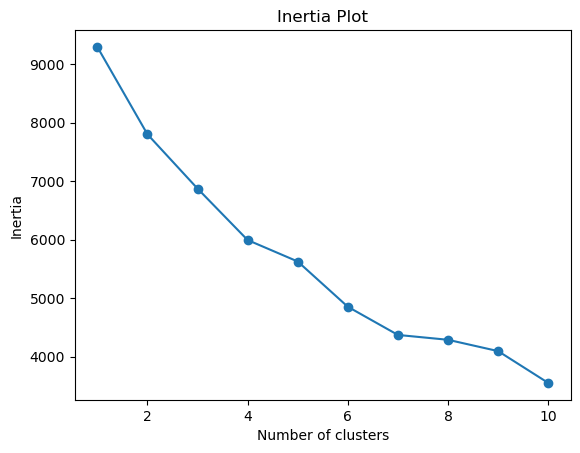

In [13]:
# Inertia plot creation 
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(buyers_mca_only)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Plot')
plt.show()

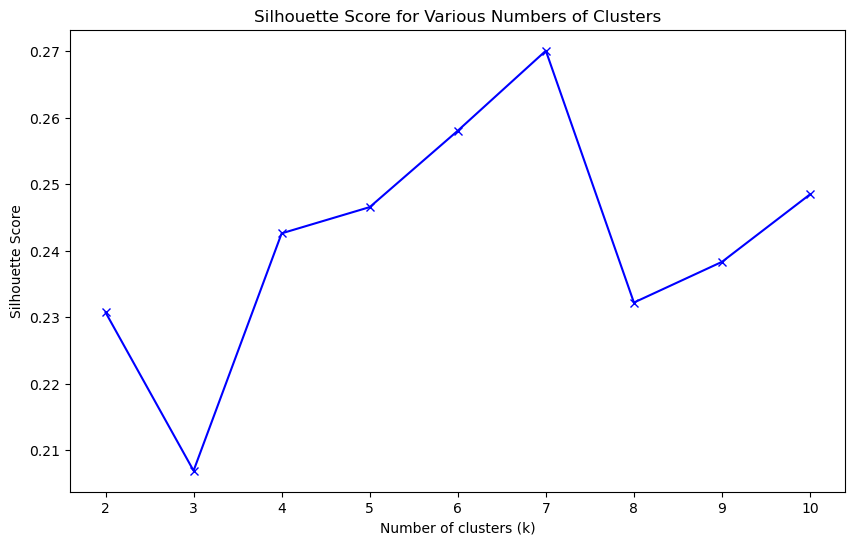

In [14]:
# Silhouette score plot
range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(buyers_mca_only)
    silhouette_avg = silhouette_score(buyers_mca_only, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()

In [15]:
# K-Means model with 4 clusters based on MCA dimensions
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(buyers_mca_only)

# Adding clusters to DataFrame
buyers_with_mca['Cluster'] = clusters

In [16]:
buyers_with_mca.head()

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
4                   0                1                  0        1   
47                  1                1                  1        1   
56                  1                0                  1        0   
62                  1                1                  0        0   
66                  0                0                  1        0   

    image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
4              0                   0                   0                    0   
47             0                   0                   0                    0   
56             0                   0                   0                    0   
62             0                   0                   0                    0   
66             0                   0                   0                    0   

    list_size_dropdown  closed_minibasket_click  checked_delivery_detail  \
4                    1                        0                        1   
47                   1                        0                        1   
56                   1                        0                        1   
62                   1                        0                        1   
66                   0                        0                        1   

    checked_returns_detail  sign_in  saw_checkout  saw_sizecharts  \
4                        0        1             1               0   
47                       0        1             1               0   
56                       0        1             1               0   
62                       0        1             1               0   
66                       0        1             1               0   

    saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
4              0                    0             1              0   
47             0                    0             1              0   
56             0                    0             1              0   
62             0                    0             1              0   
66             0                    0             0              1   

    device_computer  device_tablet  returning_user  loc_uk      MCA0  \
4                 0              1               0       1 -0.111232   
47                1              0               0       1 -0.086510   
56                0              1               0       1 -0.149576   
62                1              0               1       1  0.035546   
66                0              0               0       1  0.003597   

        MCA1      MCA2      MCA3      MCA4      MCA5      MCA6      MCA7  \
4   0.414229  0.357280  0.408941 -0.300678 -0.123697  0.142242  0.298421   
47  0.541981  0.400095 -0.132301  0.169098 -0.194959 -0.100425  0.203913   
56  0.117936  0.120673  0.052515 -0.507634 -0.010816 -0.015903  0.104279   
62  0.190745  0.297507  0.286415  0.305401 -0.171291  0.129342  0.006734   
66 -0.139051 -0.499225 -0.125859 -0.109327 -0.125289 -0.121110  0.206433   

    Cluster  
4         3  
47        0  
56        3  
62        0  
66        2

In [17]:
buyers_with_mca['Cluster'].value_counts()

Cluster
1    5556
2    5361
0    5254
3    2922
Name: count, dtype: int64

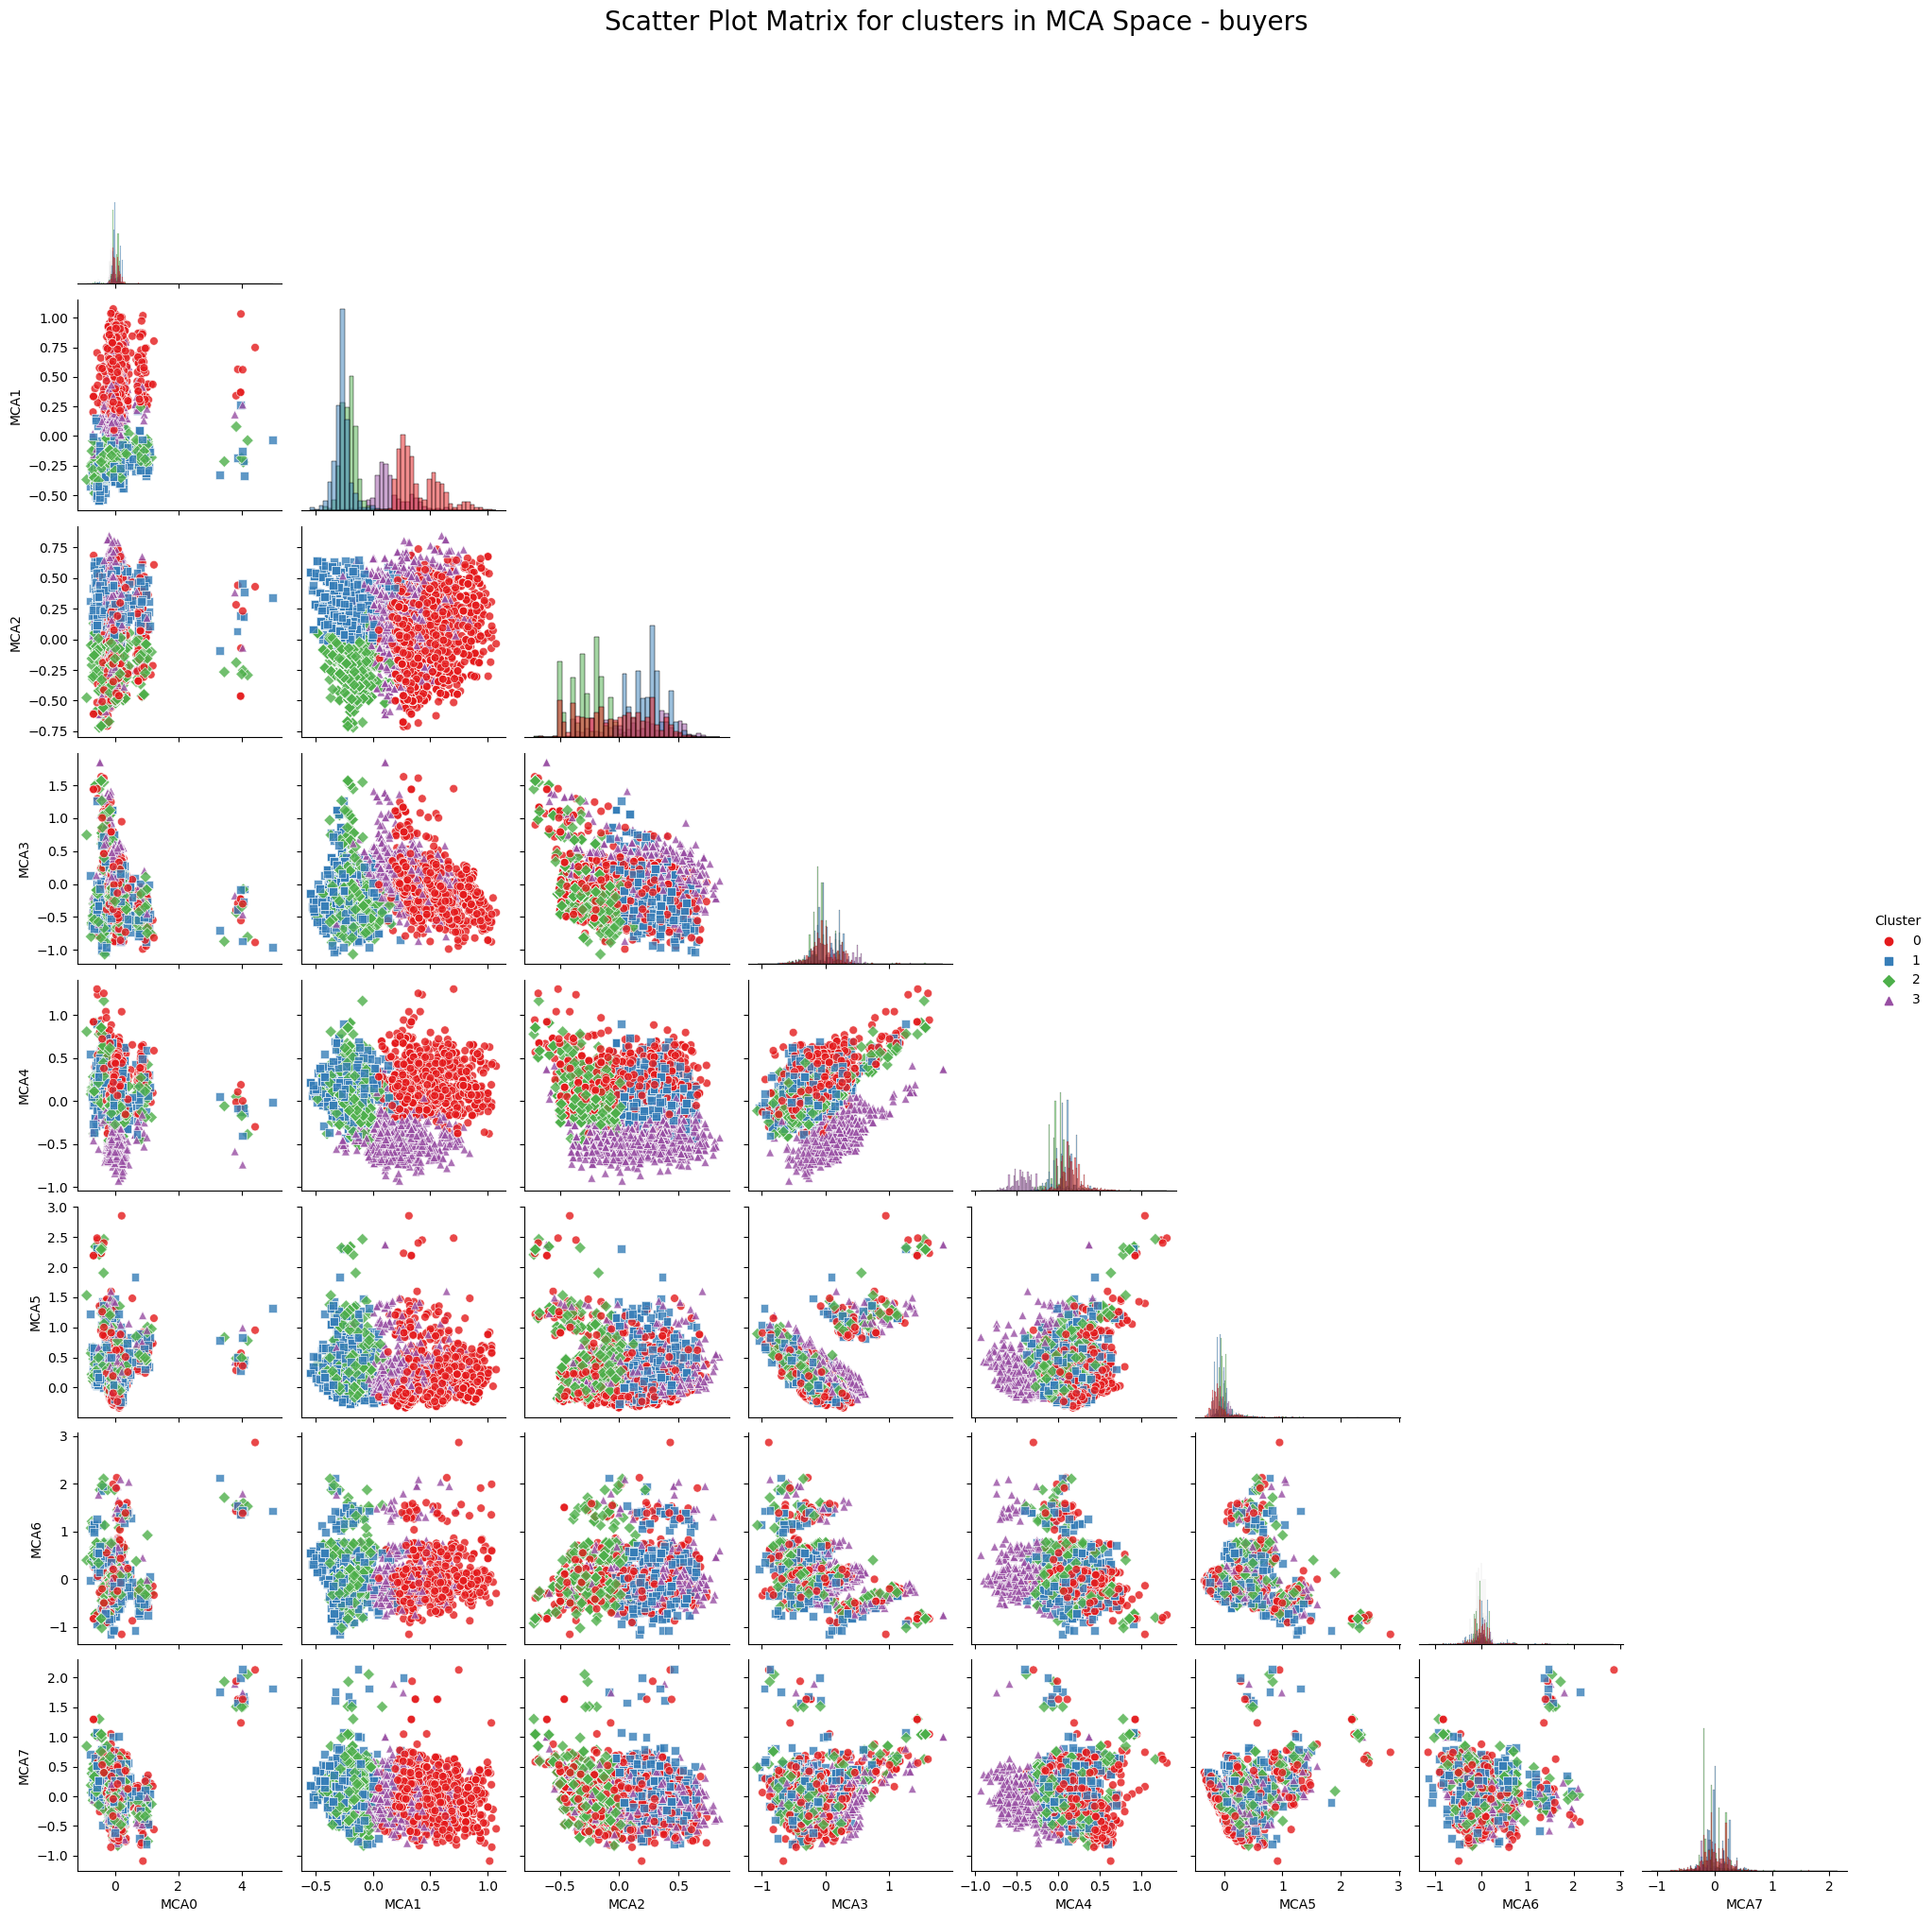

In [18]:
# We can create scatter plot for each combination of MCA dimensions and clusters
# Choosing all MCA features and cluster column
mca_and_clusters = buyers_with_mca[[f'MCA{i}' for i in range(mca.n_components)] + ['Cluster']]

# Creating scatter plot matrix 
pairplot = sns.pairplot(
    mca_and_clusters, 
    hue='Cluster', 
    palette='Set1', 
    diag_kind='hist',
    markers=['o', 's', 'D', '^'],  
    height=2.5, 
    plot_kws={'alpha': 0.8, 's': 40},
    corner=True
)
pairplot.fig.suptitle('Scatter Plot Matrix for clusters in MCA Space - buyers', y=1.02, fontsize=20)
plt.show()


In [19]:
# In order to substantively interpret each of the clusters (segments), we can calculate the average value of each feature and each MCA dimension for each of the 4 clusters. 
cluster_means = buyers_with_mca.groupby('Cluster').mean()

cluster_means = cluster_means.transpose()

display(cluster_means)

Cluster                         0         1         2         3
basket_icon_click        0.594214  0.924046  0.598955  0.722108
basket_add_list          0.430339  0.812455  0.013244  0.503765
basket_add_detail        0.764370  0.694384  0.780265  0.708419
sort_by                  0.226684  0.001080  0.000000  0.152635
image_picker             0.232585  0.001080  0.000373  0.113963
account_page_click       0.000952  0.042837  0.024063  0.002738
promo_banner_click       0.053673  0.074514  0.021638  0.050992
detail_wishlist_add      0.013704  0.010979  0.008394  0.005476
list_size_dropdown       0.471070  0.976242  0.113598  0.630390
closed_minibasket_click  0.030072  0.206263  0.050923  0.143053
checked_delivery_detail  0.989151  0.991001  0.989181  0.989049
checked_returns_detail   0.048915  0.025918  0.031711  0.041752
sign_in                  0.992387  0.997120  0.991606  0.994524
saw_checkout             1.000000  1.000000  1.000000  1.000000
saw_sizecharts           0.001332  0.001260  0.000933  0.000684
saw_delivery             0.024553  0.013319  0.011378  0.018823
saw_account_upgrade      0.005900  0.003600  0.004104  0.008898
saw_homepage             0.658736  0.737581  0.487596  0.649897
device_mobile            0.028930  0.995860  0.998881  0.044832
device_computer          0.998668  0.024478  0.009327  0.017796
device_tablet            0.004187  0.002880  0.001865  0.999316
returning_user           0.622383  0.710223  0.701735  0.677618
loc_uk                   0.939665  0.981281  0.983585  0.984600
MCA0                     0.004801  0.013490 -0.003180 -0.028449
MCA1                     0.406458 -0.264564 -0.210152  0.157773
MCA2                    -0.038196  0.232843 -0.279907  0.139488
MCA3                    -0.023728 -0.037391 -0.060458  0.224683
MCA4                     0.152218  0.080642  0.003118 -0.432759
MCA5                    -0.045600 -0.020847  0.024512  0.076661
MCA6                    -0.012077 -0.023075  0.008102  0.050727
MCA7                     0.006569  0.043733 -0.034770 -0.031176

**1. Non-buyers segmentation**

In [55]:
# Creating model with 7 components (almost 50 % of variance exlpained)
mca = prince.MCA(
    n_components=7,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Model fitting and data transformation
mca_results_non_buyers = mca.fit_transform(non_buyers)

# Adding MCA results to original dataset
non_buyers_with_mca = non_buyers.copy()

# Loop for adding all compoments to DataFrame
for i in range(mca.n_components):
    non_buyers_with_mca[f'MCA{i}'] = mca_results_non_buyers.iloc[:, i- 1]


In [56]:
# Choosing all MCA components
non_buyers_mca_only = non_buyers_with_mca[['MCA0', 'MCA1', 'MCA2', 'MCA3', 'MCA4', 'MCA5', 'MCA6']]

In [58]:
non_buyers_with_mca.head()

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  0        0   
5                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   
2             0                   0                   0                    0   
3             0                   0                   0                    0   
5             0                   0                   0                    0   

   list_size_dropdown  closed_minibasket_click  checked_delivery_detail  \
0                   0                        0                        1   
1                   0                        0                        0   
2                   0                        0                        0   
3                   0                        0                        0   
5                   0                        0                        0   

   checked_returns_detail  sign_in  saw_checkout  saw_sizecharts  \
0                       0        0             0               0   
1                       0        0             0               0   
2                       0        0             0               0   
3                       0        0             0               0   
5                       0        0             0               0   

   saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
0             0                    0             0              1   
1             0                    0             0              1   
2             0                    0             0              1   
3             0                    0             0              1   
5             0                    0             0              1   

   device_computer  device_tablet  returning_user  loc_uk      MCA0      MCA1  \
0                0              0               0       1 -0.078824  0.067837   
1                0              0               0       1  0.038645 -0.221015   
2                0              0               1       1 -0.014074 -0.185708   
3                0              0               1       1 -0.014074 -0.185708   
5                0              0               1       1 -0.014074 -0.185708   

       MCA2      MCA3      MCA4      MCA5      MCA6  
0 -0.144024  0.551140  0.684006  0.220118 -0.165827  
1 -0.158632  0.068909  0.007093 -0.004018 -0.132976  
2 -0.192355  0.015952  0.010261 -0.007087 -0.014287  
3 -0.192355  0.015952  0.010261 -0.007087 -0.014287  
5 -0.192355  0.015952  0.010261 -0.007087 -0.014287

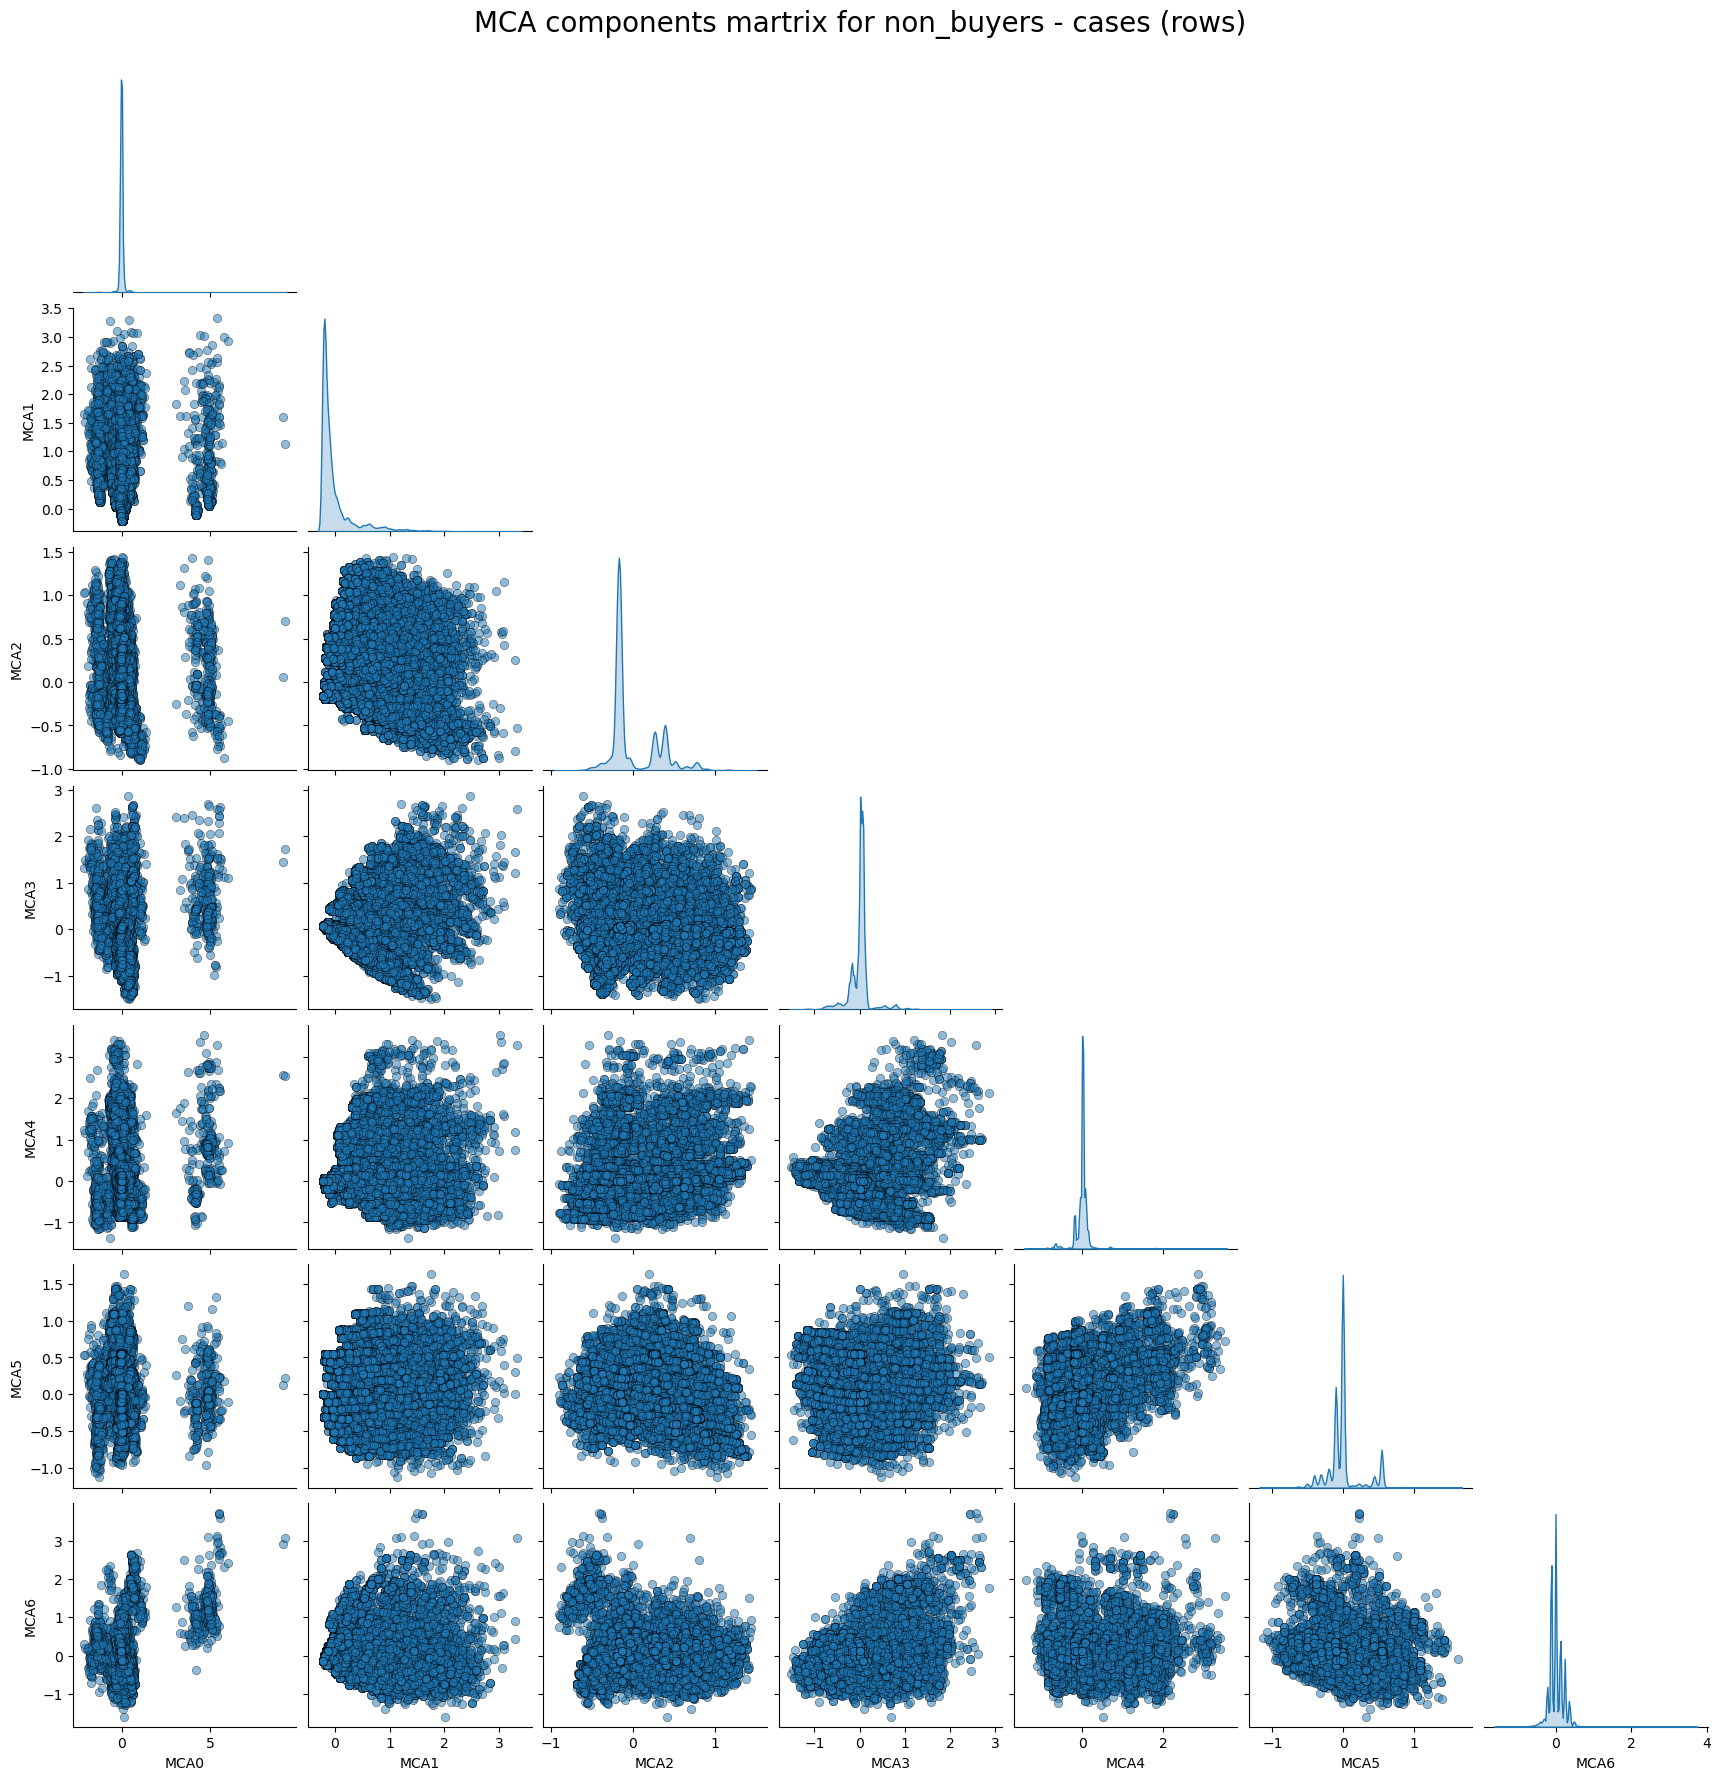

In [59]:
# Creating pairplot matrix 
pairplot = sns.pairplot(
    non_buyers_mca_only,
    diag_kind='kde',
    plot_kws={'alpha': 0.5, 'edgecolor': 'k'},
    corner=True
)
pairplot.fig.suptitle('MCA components martrix for non_buyers - cases (rows)', fontsize=20, y=1.02)
plt.show()


In [60]:
# Checking eigenvalues and % of variance explained by each component
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.129        12.91%                     12.91%
1              0.092         9.22%                     22.13%
2              0.070         7.01%                     29.14%
3              0.058         5.77%                     34.91%
4              0.056         5.57%                     40.48%
5              0.047         4.66%                     45.14%
6              0.044         4.38%                     49.51%

In [61]:
# Checking row (cases - non-buyers) coordinates for each MCA component
mca.row_coordinates(non_buyers).head()

0         1         2         3         4         5         6
0  0.067837 -0.144024  0.551140  0.684006  0.220118 -0.165827 -0.078824
1 -0.221015 -0.158632  0.068909  0.007093 -0.004018 -0.132976  0.038645
2 -0.185708 -0.192355  0.015952  0.010261 -0.007087 -0.014287 -0.014074
3 -0.185708 -0.192355  0.015952  0.010261 -0.007087 -0.014287 -0.014074
5 -0.185708 -0.192355  0.015952  0.010261 -0.007087 -0.014287 -0.014074

In [62]:
# Checking column (features) coordinates for each MCA component
mca.column_coordinates(non_buyers).head(50)

0         1         2         3         4  \
basket_icon_click__0       -0.189809  0.042683  0.077611  0.000088 -0.008893   
basket_icon_click__1        2.432911 -0.547105 -0.994792 -0.001124  0.113991   
basket_add_list__0         -0.142195  0.018942  0.109188 -0.017640 -0.006868   
basket_add_list__1          2.279484 -0.303658 -1.750354  0.282780  0.110096   
basket_add_detail__0       -0.192623  0.027238  0.047459 -0.008140 -0.008314   
basket_add_detail__1        2.060845 -0.291412 -0.507757  0.087090  0.088949   
sort_by__0                 -0.040267 -0.092467  0.025365 -0.008539  0.024388   
sort_by__1                  1.120305  2.572615 -0.705703  0.237585 -0.678528   
image_picker__0            -0.032018 -0.066658  0.005214 -0.015426  0.016865   
image_picker__1             1.284377  2.673965 -0.209169  0.618807 -0.676514   
account_page_click__0      -0.008366  0.005216 -0.012337  0.003775  0.003605   
account_page_click__1       2.921101 -1.821355  4.307770 -1.317940 -1.258716   
promo_banner_click__0      -0.024016 -0.007058  0.017052 -0.017319  0.006324   
promo_banner_click__1       1.608102  0.472633 -1.141782  1.159672 -0.423441   
detail_wishlist_add__0     -0.008773 -0.000243 -0.006843  0.004927  0.002598   
detail_wishlist_add__1      2.715711  0.075112  2.118314 -1.524967 -0.804133   
list_size_dropdown__0      -0.239433  0.009706  0.253064 -0.088369  0.001865   
list_size_dropdown__1       0.865366 -0.035079 -0.914631  0.319387 -0.006742   
closed_minibasket_click__0 -0.041950  0.009537  0.033200 -0.000390 -0.019367   
closed_minibasket_click__1  3.074529 -0.698996 -2.433256  0.028566  1.419411   
checked_delivery_detail__0 -0.053275 -0.002277 -0.065544 -0.083453 -0.027145   
checked_delivery_detail__1  2.333943  0.099753  2.871445  3.656010  1.189203   
checked_returns_detail__0  -0.016651 -0.003911 -0.024329 -0.048974 -0.014067   
checked_returns_detail__1   2.066763  0.485501  3.019795  6.078799  1.746005   
sign_in__0                 -0.159095  0.035657 -0.112173  0.087553  0.012112   
sign_in__1                  3.074301 -0.689029  2.167594 -1.691844 -0.234042   
saw_checkout__0            -0.133086  0.029346 -0.099277  0.078442  0.008014   
saw_checkout__1             3.208290 -0.707449  2.393271 -1.890990 -0.193203   
saw_sizecharts__0          -0.000319 -0.000319 -0.000820  0.000647  0.000218   
saw_sizecharts__1           0.892308  0.891244  2.292133 -1.809816 -0.609038   
saw_delivery__0            -0.012179 -0.002439 -0.021357 -0.034367 -0.009295   
saw_delivery__1             2.397614  0.480218  4.204587  6.765935  1.829834   
saw_account_upgrade__0     -0.001987 -0.000187 -0.001961 -0.004133 -0.000258   
saw_account_upgrade__1      2.165808  0.204164  2.136863  4.504363  0.281038   
saw_homepage__0            -0.208841 -0.054830  0.092424  0.011403  0.154640   
saw_homepage__1             0.550453  0.144519 -0.243606 -0.030054 -0.407593   
device_mobile__0            0.179778  1.332773  0.060404 -0.255557  0.360157   
device_mobile__1           -0.082714 -0.613194 -0.027791  0.117579 -0.165704   
device_computer__0         -0.058625 -0.368603 -0.045282  0.000518  0.197496   
device_computer__1          0.249690  1.569904  0.192860 -0.002208 -0.841150   
device_tablet__0           -0.015846 -0.140119  0.019304  0.093175 -0.312461   
device_tablet__1            0.108753  0.961629 -0.132481 -0.639459  2.144411   
returning_user__0          -0.154250  0.124511  0.170498 -0.009251  0.008804   
returning_user__1           0.137545 -0.111026 -0.152034  0.008249 -0.007850   
loc_uk__0                   0.139673  0.796147  0.176654  0.312044 -1.547003   
loc_uk__1                  -0.010260 -0.058481 -0.012976 -0.022921  0.113635   

                                   5          6  
basket_icon_click__0        0.051364  -0.033398  
basket_icon_click__1       -0.658369   0.428090  
basket_add_list__0          0.006832   0.001692  
basket_add_list__1         -0.109527  -0.027117  
basket_add_detail__0    

In [63]:
# Features coordinetes
column_coords = mca.column_coordinates(non_buyers)

# Weight calculations for each dimension (absolute values)
absolute_weights = column_coords.abs()

# 3 features with highest weights for each dimension
top_variables_per_dimension = {}
for dimension in absolute_weights.columns:
    top_variables = absolute_weights[dimension].nlargest(3)
    top_variables_per_dimension[dimension] = top_variables

for dimension, top_variables in top_variables_per_dimension.items():
    print(f"Top 3 variables for dimension {dimension}:")
    display(top_variables)

Top 3 variables for dimension 0:


saw_checkout__1               3.208290
closed_minibasket_click__1    3.074529
sign_in__1                    3.074301
Name: 0, dtype: float64

Top 3 variables for dimension 1:


image_picker__1          2.673965
sort_by__1               2.572615
account_page_click__1    1.821355
Name: 1, dtype: float64

Top 3 variables for dimension 2:


account_page_click__1        4.307770
saw_delivery__1              4.204587
checked_returns_detail__1    3.019795
Name: 2, dtype: float64

Top 3 variables for dimension 3:


saw_delivery__1              6.765935
checked_returns_detail__1    6.078799
saw_account_upgrade__1       4.504363
Name: 3, dtype: float64

Top 3 variables for dimension 4:


device_tablet__1             2.144411
saw_delivery__1              1.829834
checked_returns_detail__1    1.746005
Name: 4, dtype: float64

Top 3 variables for dimension 5:


account_page_click__1     8.056133
saw_account_upgrade__1    5.957216
saw_sizecharts__1         4.761230
Name: 5, dtype: float64

Top 3 variables for dimension 6:


saw_account_upgrade__1    23.610523
saw_sizecharts__1         19.999802
detail_wishlist_add__1     5.973976
Name: 6, dtype: float64

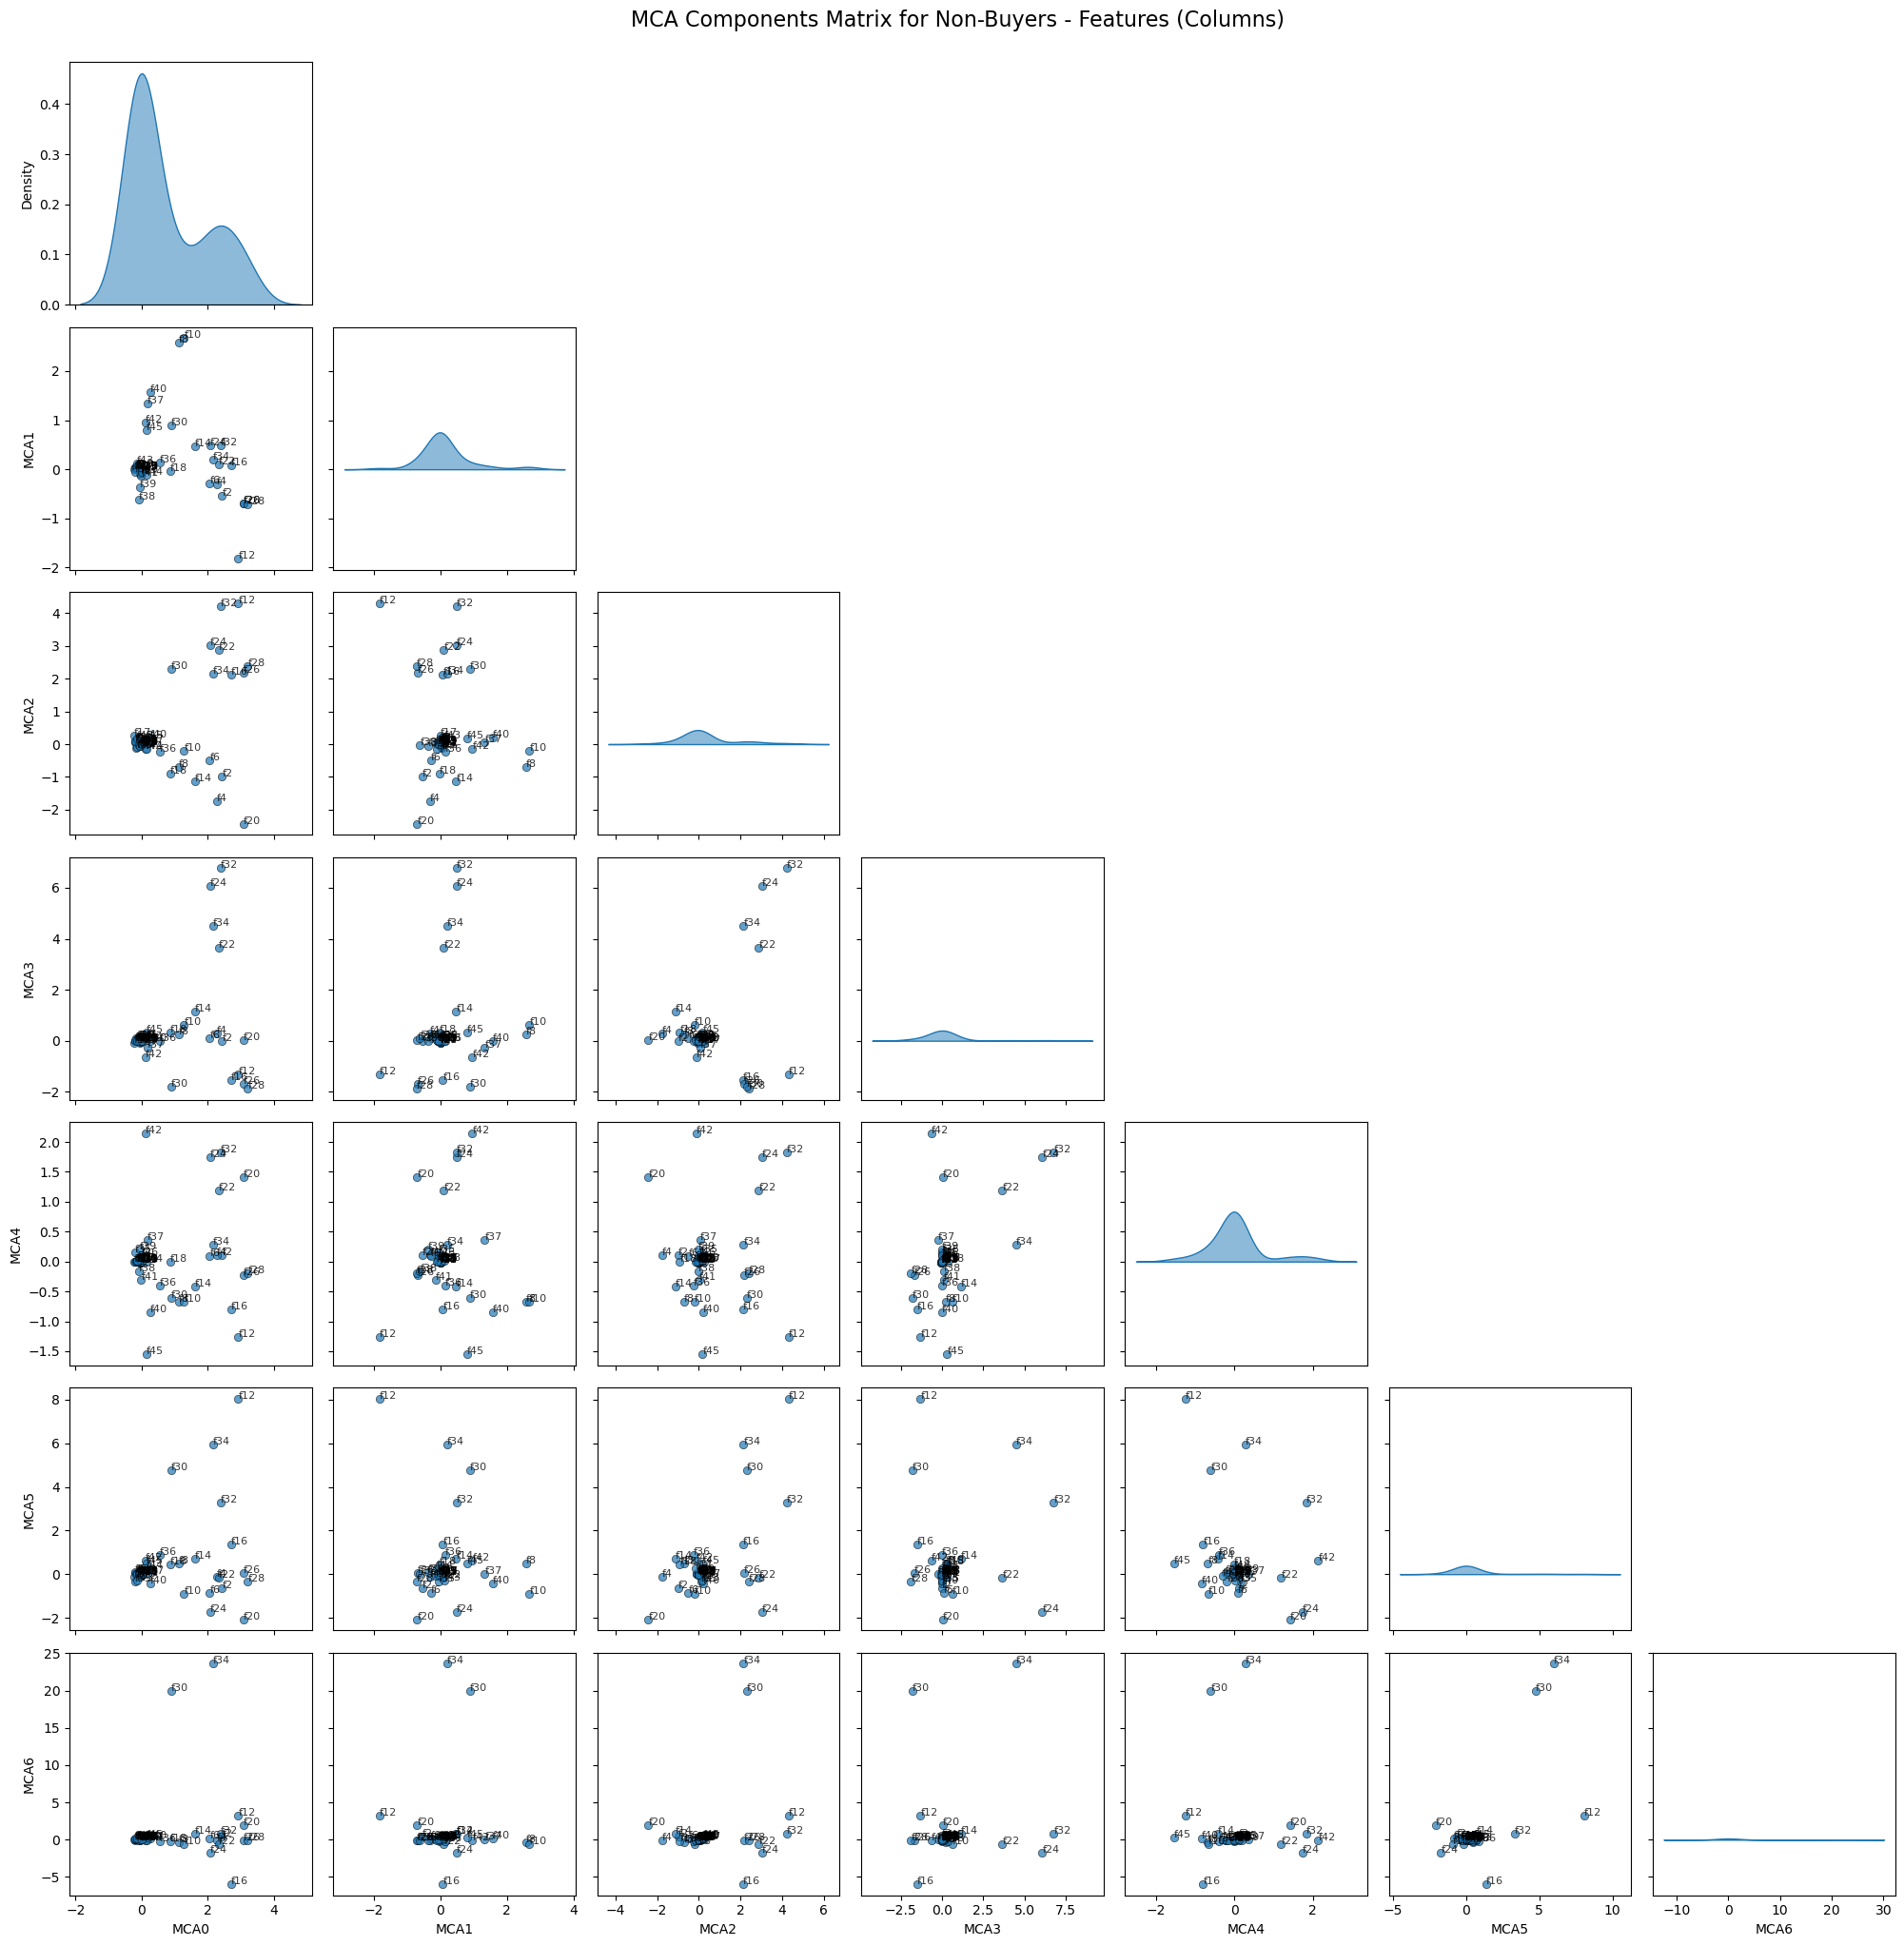

Feature Short Names Mapping (Non-Buyers):
f1: basket_icon_click__0
f2: basket_icon_click__1
f3: basket_add_list__0
f4: basket_add_list__1
f5: basket_add_detail__0
f6: basket_add_detail__1
f7: sort_by__0
f8: sort_by__1
f9: image_picker__0
f10: image_picker__1
f11: account_page_click__0
f12: account_page_click__1
f13: promo_banner_click__0
f14: promo_banner_click__1
f15: detail_wishlist_add__0
f16: detail_wishlist_add__1
f17: list_size_dropdown__0
f18: list_size_dropdown__1
f19: closed_minibasket_click__0
f20: closed_minibasket_click__1
f21: checked_delivery_detail__0
f22: checked_delivery_detail__1
f23: checked_returns_detail__0
f24: checked_returns_detail__1
f25: sign_in__0
f26: sign_in__1
f27: saw_checkout__0
f28: saw_checkout__1
f29: saw_sizecharts__0
f30: saw_sizecharts__1
f31: saw_delivery__0
f32: saw_delivery__1
f33: saw_account_upgrade__0
f34: saw_account_upgrade__1
f35: saw_homepage__0
f36: saw_homepage__1
f37: device_mobile__0
f38: device_mobile__1
f39: device_computer__0
f40: 

In [68]:
# Filter data for non-buyers (rows where 'ordered' is 0)
non_buyers = df_train[df_train['ordered'] == 0].drop(columns=['ordered', 'UserID'])

# Reindex non-buyers data to match the MCA model's active rows
non_buyers = non_buyers.reindex(index=mca.active_rows_, fill_value=0)

# Compute column coordinates for non-buyers
non_buyers_column_coords = mca.column_coordinates(non_buyers)

# Convert coordinates to a DataFrame
non_buyers_column_coords_df = non_buyers_column_coords.reset_index()
non_buyers_column_coords_df.columns = ['Feature'] + [f'MCA{i}' for i in range(mca.n_components)]

# Create a mapping of original features to shortened labels (f1, f2, ..., f22)
short_labels = {feature: f"f{i+1}" for i, feature in enumerate(non_buyers_column_coords.index)}
non_buyers_column_coords_df['Short Feature'] = non_buyers_column_coords_df['Feature'].map(short_labels)

# Select dimensions for visualization (all 7 MCA components)
dimensions = [f'MCA{i}' for i in range(7)]
num_dims = len(dimensions)

# Create a pairplot-like grid for the MCA dimensions
fig, axes = plt.subplots(num_dims, num_dims, figsize=(20, 20), sharex='col', sharey='row')

for i in range(num_dims):
    for j in range(num_dims):
        ax = axes[i, j]
        # Plot diagonal with KDE for individual dimensions
        if i == j:
            sns.kdeplot(
                non_buyers_column_coords_df[dimensions[i]], 
                ax=ax, 
                fill=True, 
                alpha=0.5
            )
        # Plot scatterplots for the lower triangle of the matrix
        elif i > j:
            sns.scatterplot(
                x=non_buyers_column_coords_df[dimensions[j]], 
                y=non_buyers_column_coords_df[dimensions[i]], 
                ax=ax, 
                alpha=0.7, 
                edgecolor='k'
            )
            # Annotate points with their shortened feature labels
            for _, row in non_buyers_column_coords_df.iterrows():
                ax.annotate(
                    row['Short Feature'], 
                    (row[dimensions[j]], row[dimensions[i]]), 
                    fontsize=8, 
                    alpha=0.8
                )
        # Leave upper triangle of the matrix empty
        else:
            ax.axis('off')

# Adjust layout and add title
plt.tight_layout()
fig.suptitle('MCA Components Matrix for Non-Buyers - Features (Columns)', fontsize=16, y=1.02)
plt.show()

# Display the mapping of original feature names to short labels
print("Feature Short Names Mapping (Non-Buyers):")
for original, short in short_labels.items():
    print(f"{short}: {original}")


K-means clusterization (segmentation)

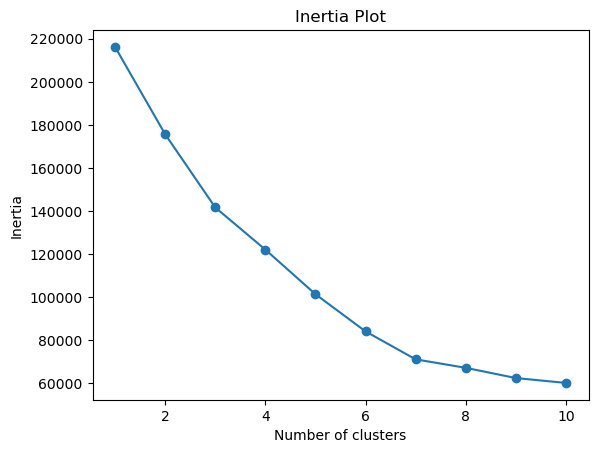

In [28]:
# Inertia plot
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(non_buyers_mca_only)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Plot')
plt.show()


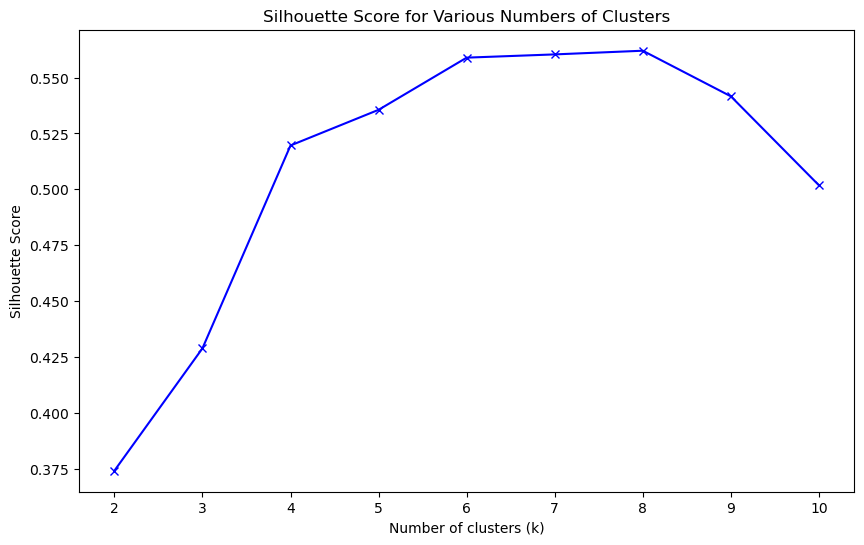

In [36]:
# Due to the large number of non-buyers (and low computing skills of my computer), the silhouette scores will be calculated for a data sample representing 10% of this dataset (n= 43630)
# Data set sampling
sample_size = 43630
if len(non_buyers_mca_only) > sample_size:
    sample_data = non_buyers_mca_only.sample(n=sample_size, random_state=42)
else:
    sample_data = non_buyers_mca_only

range_n_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(sample_data)
    silhouette_avg = silhouette_score(sample_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()


In [71]:
# K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(non_buyers_mca_only)

# Adding clusters to DataFrame
non_buyers_with_mca['Cluster'] = clusters

In [72]:
non_buyers_with_mca.head()

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  0        0   
5                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   
2             0                   0                   0                    0   
3             0                   0                   0                    0   
5             0                   0                   0                    0   

   list_size_dropdown  closed_minibasket_click  checked_delivery_detail  \
0                   0                        0                        1   
1                   0                        0                        0   
2                   0                        0                        0   
3                   0                        0                        0   
5                   0                        0                        0   

   checked_returns_detail  sign_in  saw_checkout  saw_sizecharts  \
0                       0        0             0               0   
1                       0        0             0               0   
2                       0        0             0               0   
3                       0        0             0               0   
5                       0        0             0               0   

   saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
0             0                    0             0              1   
1             0                    0             0              1   
2             0                    0             0              1   
3             0                    0             0              1   
5             0                    0             0              1   

   device_computer  device_tablet  returning_user  loc_uk      MCA0      MCA1  \
0                0              0               0       1 -0.078824  0.067837   
1                0              0               0       1  0.038645 -0.221015   
2                0              0               1       1 -0.014074 -0.185708   
3                0              0               1       1 -0.014074 -0.185708   
5                0              0               1       1 -0.014074 -0.185708   

       MCA2      MCA3      MCA4      MCA5      MCA6  Cluster  
0 -0.144024  0.551140  0.684006  0.220118 -0.165827        1  
1 -0.158632  0.068909  0.007093 -0.004018 -0.132976        1  
2 -0.192355  0.015952  0.010261 -0.007087 -0.014287        1  
3 -0.192355  0.015952  0.010261 -0.007087 -0.014287        1  
5 -0.192355  0.015952  0.010261 -0.007087 -0.014287        1

In [73]:
non_buyers_with_mca['Cluster'].value_counts()

Cluster
1    284317
2     78909
3     52416
0     20666
Name: count, dtype: int64

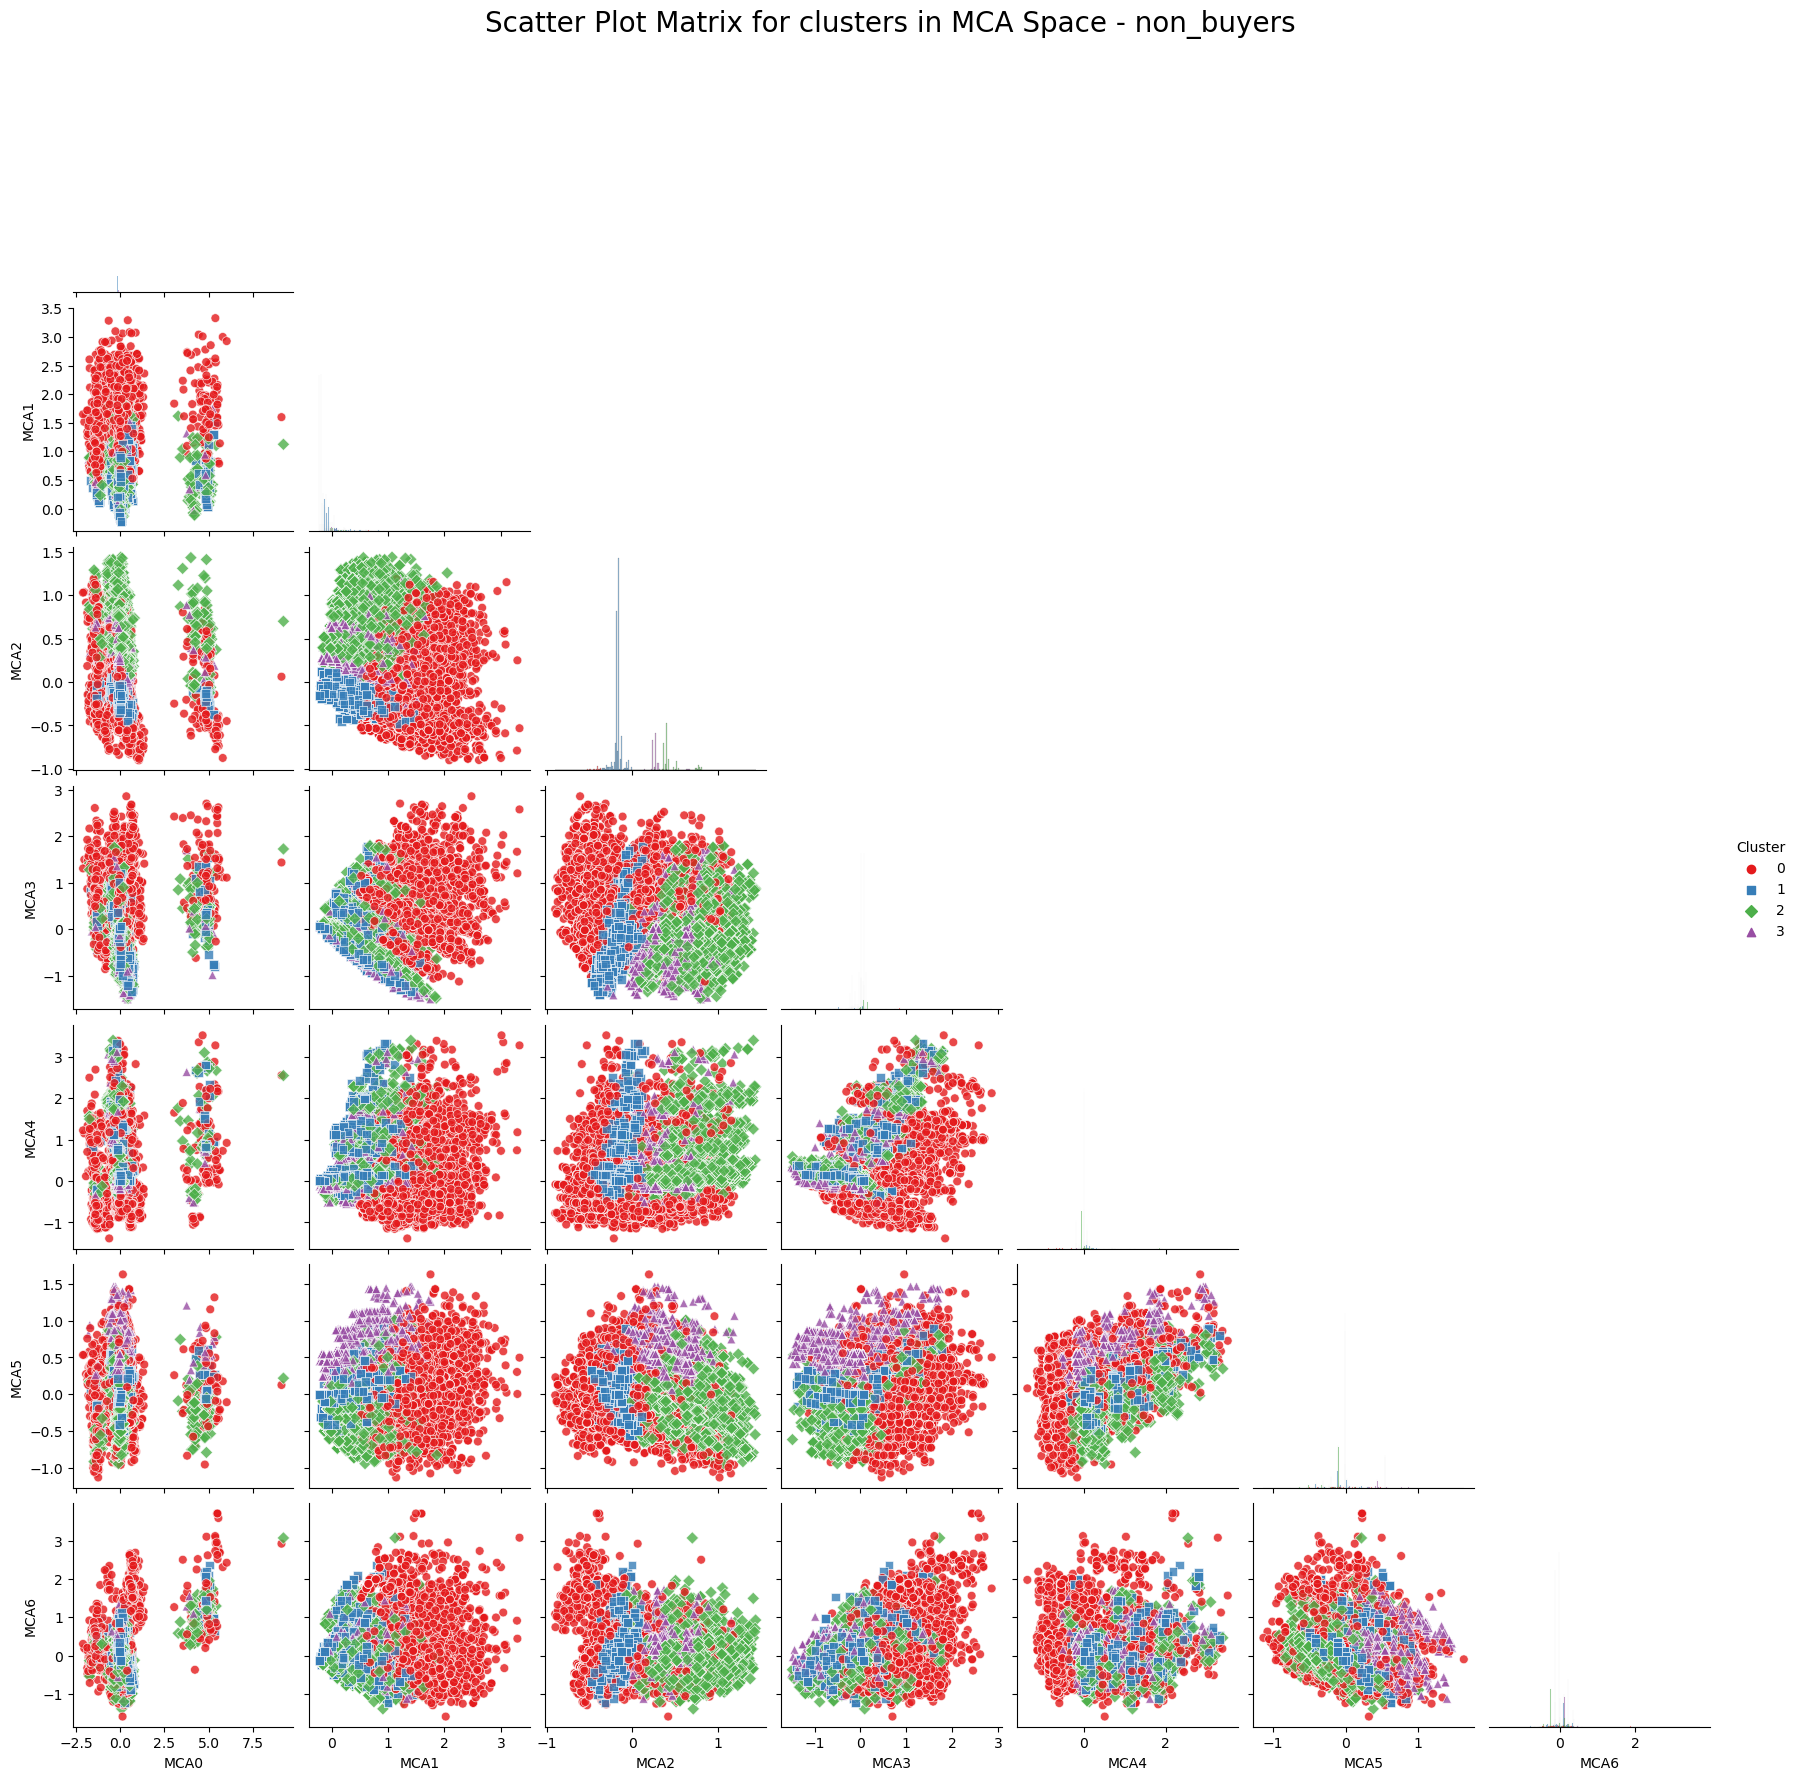

In [74]:
# Choosing all MCA features and cluster column
mca_and_clusters = non_buyers_with_mca[[f'MCA{i}' for i in range(mca.n_components)] + ['Cluster']]

# Creating scatter plot matrix 
pairplot = sns.pairplot(
    mca_and_clusters, 
    hue='Cluster', 
    palette='Set1', 
    diag_kind='hist',
    markers=['o', 's', 'D', '^'],  
    height=2.5, 
    plot_kws={'alpha': 0.8, 's': 40},
    corner=True
)
pairplot.fig.suptitle('Scatter Plot Matrix for clusters in MCA Space - non_buyers', y=1.02, fontsize=20)
plt.show()


In [ ]:
# The average value of each feature and each MCA dimension for each of the 4 clusters (clustering interpretation) 
cluster_means = non_buyers_with_mca.groupby('Cluster').mean()

cluster_means = cluster_means.transpose()

display(cluster_means)

Cluster                         0         1         2         3
basket_icon_click        0.448321  0.057436  0.047713  0.042277
basket_add_list          0.255347  0.048467  0.049057  0.051339
basket_add_detail        0.465015  0.066373  0.072362  0.059219
sort_by                  0.057921  0.000011  0.135663  0.061680
image_picker             0.049405  0.000000  0.098290  0.035008
account_page_click       0.059518  0.000056  0.000000  0.000000
promo_banner_click       0.043937  0.010467  0.022114  0.015091
detail_wishlist_add      0.051244  0.000714  0.001267  0.000820
list_size_dropdown       0.397319  0.205605  0.194388  0.239431
closed_minibasket_click  0.067502  0.009929  0.006527  0.021749
checked_delivery_detail  0.171538  0.012553  0.023686  0.014385
checked_returns_detail   0.039775  0.005008  0.010962  0.007173
sign_in                  0.982145  0.002276  0.004296  0.003529
saw_checkout             0.822365  0.001059  0.000418  0.000935
saw_sizecharts           0.001065  0.000004  0.001546  0.000210
saw_delivery             0.032711  0.002670  0.006717  0.004579
saw_account_upgrade      0.005807  0.000489  0.001343  0.000668
saw_homepage             0.534259  0.247780  0.326059  0.243952
device_mobile            0.679764  1.000000  0.003358  0.003682
device_computer          0.215330  0.000482  0.992650  0.000897
device_tablet            0.124891  0.000018  0.006172  1.000000
returning_user           0.650876  0.540467  0.457895  0.522665
loc_uk                   0.923739  0.948149  0.847014  0.972031
MCA0                    -0.027586 -0.008609  0.046598 -0.012578
MCA1                     1.145143 -0.087015  0.027782 -0.021327
MCA2                    -0.218882 -0.174646  0.489802  0.296255
MCA3                     0.589454 -0.035990  0.015523 -0.060553
MCA4                    -0.392499  0.047728  0.022240 -0.137621
MCA5                    -0.048268 -0.037182 -0.193022  0.511296
MCA6                     0.016583 -0.002737 -0.086919  0.139157

In [47]:
# Adding buyers MCA components and clusters to csv file
buyers_with_mca.to_csv('Data/buyers_with_clusters.csv')

In [44]:
# Adding nonbuyers MCA components and clusters to csv file
non_buyers_with_mca.to_csv('Data/non_buyers_with_clusters.csv')